# K_Nearst Neighbors (KNN)
- KNN is a supervised learning algorithm that can be used for both classification and regression tasks.
It works by finding the K most similar instances to a new instance and using their labels or values to
predict the label or value of the new instance.
- A data point is known by the nearst point
- The value of k , tell in the nearst neighbor of data
- KNN is a lazy algorithm, meaning that it doesn't do any processing until it's asked
to make a prediction. This makes it memory-efficient and easy to implement, but it can also make
it slow for large datasets.
- KNN is a non-parametric algorithm, meaning that it doesn't make any assumptions about the
distribution of the data.


## Mathematics Behind the KNN
- The KNN algorithm is based on the concept of distance between data points. The distance between two points
  - `(x_1, y_1), (x_2, y_2)`
      - in a two-dimensional space is given by the Euclidean distance formula:
  - `d(x,y) = sqrt{(x_2 - x_1)^2 + (y_2 -y_1)^2}`
- The KNN algorithm works by finding the K nearest neighbors to a new data point and then classifying
the new data point based on the majority vote of its neighbors.
- The KNN algorithm is sensitive to the choice of K. If K is too small, the
algorithm may be dominated by noise in the data. If K is too large, the algorithm may lose
the ability to capture the underlying patterns in the data.
- The KNN algorithm can be used for both classification and regression tasks. For classification tasks,
the algorithm outputs the most common class among the K nearest neighbors. For regression tasks,
the algorithm outputs the average value of the K nearest neighbors.
- The final answer is: $\boxed{5}$

### Advantages of KNN:
- Simple and easy to use
- Training Phase is easy
- Vercatile

### Uses of KNN Algorithms:
- Recommendation System
- Finance System
- Banking System for Fraud Detection
- Health Care for desease prdiction

### Methods used in KNN:
1. Euclidient Distance
2. Manhattan Distance
3. Minkonshi Distance
4. Hamming Distance

***Import the python libraries***

In [160]:
#Import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
#Import the ML sklearn libraries for knn:
from sklearn.neighbors import KNeighborsClassifier
#train_test_split library:
from sklearn.model_selection import train_test_split
#import the evalution models
from sklearn.metrics import classification_report, confusion_matrix
#Import the preprosessing models:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, MaxAbsScaler

In [162]:
#Load the dataset of cancer prediction:
df = sns.load_dataset('iris')

In [163]:
#Check the data set:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [164]:
#Apply the labelencoder:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "float" or df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sepal_length  150 non-null    int64
 1   sepal_width   150 non-null    int64
 2   petal_length  150 non-null    int64
 3   petal_width   150 non-null    int64
 4   species       150 non-null    int64
dtypes: int64(5)
memory usage: 6.0 KB


In [166]:
#Split the dataset:
X = df.drop('species', axis=1)
y = df['species']

In [176]:
#Apply the model:
model = KNeighborsClassifier(n_neighbors=5)
#Fit the model:
model.fit(X, y)

KNeighborsClassifier()

In [178]:
#Model prediction
new_measurenment = np.array([[5.1, 3.5, 1.4, 0.2]])

In [179]:
#Predict the value:
model.predict(new_measurenment)

c:\Users\Al Hafiz Enterprises\miniconda3\envs\pythonl_ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [180]:
#Train_test_split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
#Fit the model on the X_train, y_train
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [184]:
#Preprocess the data into the StandardScaler:
scaler = StandardScaler()
# Fit and transform the data
scaled_model = scaler.fit_transform(X)

In [185]:
#Predict the model:
y_pred = model.predict(X_test)

In [186]:
#Predict the model:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,18,7,23,8
18,14,17,7,2
118,33,5,42,19
78,17,8,21,11
76,25,7,24,10


In [190]:
#Apply the evlation models:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("========================================")
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



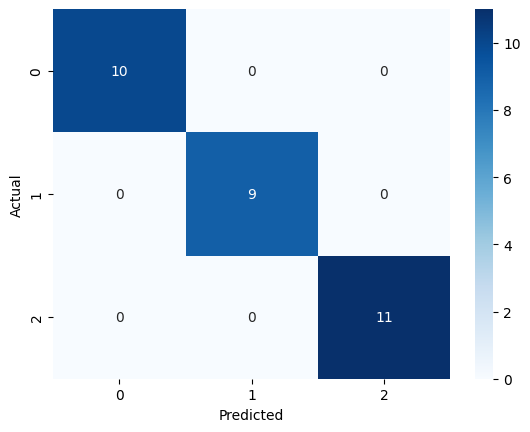

In [191]:
#Make a plot of Confusion Matrix:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [193]:
#Save the model:
import pickle
pickle.dump(model, open('knn_model.pkl', 'wb'))

In [192]:
#Check the model:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,18,7,23,8
18,14,17,7,2
118,33,5,42,19
78,17,8,21,11
76,25,7,24,10


In [195]:
#Predict the value:
print('predicted values: ', model.predict([[18, 7, 23, 8]]))

predicted values:  [1]


c:\Users\Al Hafiz Enterprises\miniconda3\envs\pythonl_ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
